# RNN_Tutorial_codes

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
sequence=np.arange(0, 100, dtype=float)
sequence1=sequence/100.0
sequence1

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99])

In [ ]:
x = np.linspace(0, 50, 1000)
y = np.sin(x)

print('First 10 x values:', x[:10])
print('First 10 y values:', y[:10])

First 10 x values: [0.         0.05005005 0.1001001  0.15015015 0.2002002  0.25025025
 0.3003003  0.35035035 0.4004004  0.45045045]
First 10 y values: [0.         0.05002916 0.09993302 0.14958659 0.19886554 0.24764642
 0.29580708 0.3432269  0.3897871  0.4353711 ]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(10, activation='tanh', input_shape=(10, 1)),  # Input shape should match the input data dimensions
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

model.summary

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7b647024af20>>

In [ ]:
x_train = []
y_train = []
for i in range(len(x) - 10):
    x_train.append(x[i:i+10])
    y_train.append(y[i+10])

x_train = np.array(x_train).reshape(-1, 10, 1)
y_train = np.array(y_train)

history = model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
31/31 [==============================] - 1s 3ms/step - loss: 0.6343
Epoch 2/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4847
Epoch 3/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4740
Epoch 4/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4691
Epoch 5/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4664
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4647
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4620
Epoch 8/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4612
Epoch 9/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4598
Epoch 10/10
31/31 [==============================] - 0s 3ms/step - loss: 0.4591


In [ ]:
# Prepare the test data
x_test = []
y_test = []
for i in range(len(x) - 20, len(x) - 10):
    x_test.append(x[i:i+10])
    y_test.append(y[i+10])

x_test = np.array(x_test).reshape(-1, 10, 1)
y_test = np.array(y_test)

loss = model.evaluate(x_test, y_test)
print(f'Mean Squared Error: {loss}')

1/1 [==============================] - 0s 198ms/step - loss: 0.1970
Mean Squared Error: 0.19696521759033203


31/31 [==============================] - 0s 2ms/step - loss: 0.4569
Training loss: 0.4568895101547241
31/31 [==============================] - 0s 2ms/step


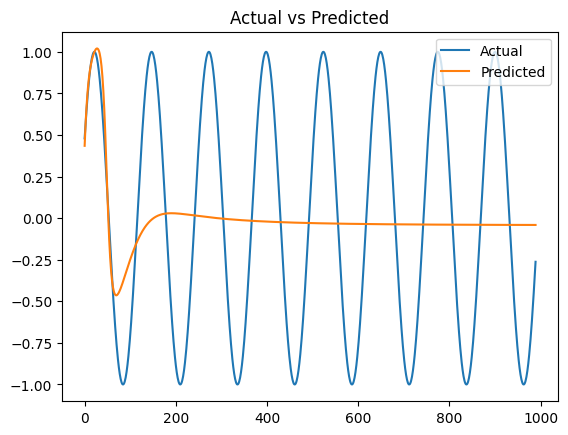

In [ ]:
loss=model.evaluate(x_train, y_train)

print('Training loss:', loss)

y_pred=model.predict(x_train)

plt.figsize=(10,6)
plt.plot(y_train,label='Actual')
plt.plot(y_pred,label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

# RNN_TEXT_Tutorial_Codes

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
sentence=['I Love Programming', 'Data Science is awesome','NLp is a part of AI' ]
tokenizer=Tokenizer(num_words=100, oov_token='<OOV>')

In [ ]:
tokenizer.fit_on_texts(sentence)

In [ ]:
word_index=tokenizer.word_index

In [ ]:
sequences=tokenizer.texts_to_sequences(sentence)

In [ ]:
padded_sequences=pad_sequences(sequences,padding='post')
padded_sequences

array([[ 3,  4,  5,  0,  0,  0],
       [ 6,  7,  2,  8,  0,  0],
       [ 9,  2, 10, 11, 12, 13]], dtype=int32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,SimpleRNN,Dense

In [ ]:
from keras.models import Sequential
model = Sequential([
    Embedding(100,64,input_length=10),
    Dense(1,activation=tf.sigmoid)
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 10, 64)            6400      
                                                                 
 dense_8 (Dense)             (None, 10, 1)             65        
                                                                 
Total params: 6465 (25.25 KB)
Trainable params: 6465 (25.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
train_sequences = np.array(padded_sequences)
labels = np.array([1, 0, 1])


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np

model = Sequential()
model.add(Embedding(input_dim=100, output_dim=64, input_length=6))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

train_sequences = np.array(padded_sequences)
labels = np.array([1, 0, 1])

history = model.fit(train_sequences, labels, epochs=3)


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 6, 64)             6400      
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dense_9 (Dense)             (None, 1)                 33        
                                                                 
Total params: 18849 (73.63 KB)
Trainable params: 18849 (73.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/3
1/1 [==============================] - 2s 2s/step - loss: 0.6889 - accuracy: 0.6667
Epoch 2/3
1/1 [==============================] - 0s 13ms/step - loss: 0.6854 - accuracy: 0.6667
Epoch 3/3
1/1 [==============================] - 0s 13ms/step - loss: 0.6818 - accuracy: 0.

In [ ]:
train_labels = np.array([0, 1, 0])
history=model.fit(padded_sequences, train_labels, epochs=5, batch_size=1)

Epoch 1/5
3/3 [==============================] - 0s 18ms/step - loss: 0.7116 - accuracy: 0.3333
Epoch 2/5
3/3 [==============================] - 0s 23ms/step - loss: 0.7094 - accuracy: 0.3333
Epoch 3/5
3/3 [==============================] - 0s 19ms/step - loss: 0.7069 - accuracy: 0.3333
Epoch 4/5
3/3 [==============================] - 0s 11ms/step - loss: 0.7022 - accuracy: 0.3333
Epoch 5/5
3/3 [==============================] - 0s 12ms/step - loss: 0.6970 - accuracy: 0.3333


In [ ]:
test_sentence=['I Love Programming','programming is fun','AI is a part of computer Science']
test_labels=[1,0,1]

In [ ]:
test_sequence = [str(item) for item in test_sequence]

test_sequences = tokenizer.texts_to_sequences(test_sequence)
maxlen = 6
padded_test_sequences = pad_sequences(test_sequences, maxlen=maxlen, padding='post')


In [ ]:
test_labels = np.array(test_labels)
test_loss,test_accuracy=model.evaluate(padded_test_sequences,test_labels)
test_accuracy

1/1 [==============================] - 0s 476ms/step - loss: 0.6930 - accuracy: 0.6667


0.6666666865348816